     pcost       dcost       gap    pres   dres
 0: -1.5216e-01 -7.6317e+00  7e+00  6e-17  4e-16
 1: -1.5501e-01 -3.8450e-01  2e-01  2e-16  6e-16
 2: -2.2595e-01 -2.6192e-01  4e-02  2e-16  9e-17
 3: -2.4598e-01 -2.4654e-01  6e-04  3e-16  5e-17
 4: -2.4620e-01 -2.4620e-01  6e-06  2e-16  5e-17
 5: -2.4620e-01 -2.4620e-01  6e-08  3e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5212e-01 -7.6315e+00  7e+00  1e-16  2e-16
 1: -1.5496e-01 -3.8418e-01  2e-01  3e-16  5e-16
 2: -2.2536e-01 -2.6135e-01  4e-02  2e-16  4e-17
 3: -2.4552e-01 -2.4607e-01  6e-04  2e-16  2e-17
 4: -2.4573e-01 -2.4574e-01  6e-06  2e-16  2e-17
 5: -2.4574e-01 -2.4574e-01  6e-08  2e-16  4e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5207e-01 -7.6313e+00  7e+00  1e-16  2e-16
 1: -1.5490e-01 -3.8382e-01  2e-01  3e-16  3e-16
 2: -2.2471e-01 -2.6071e-01  4e-02  4e-16  2e-17
 3: -2.4500e-01 -2.4555e-01  5e-04  2e-16  5e-17
 4: -2.4521e-01 -2.4522e

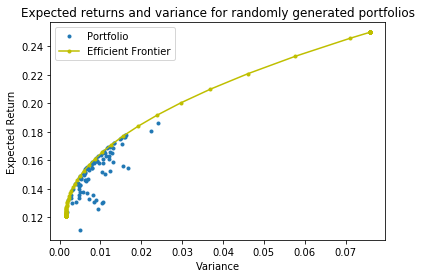

In [1]:
# without short sale constraint, -1 <= portion <= 1
%matplotlib inline
import numpy as np, numpy.random
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers

np.random.seed(1) # fixed random seed
n_portfolio = 100 # number of portfolios
n_asset = 3 # number of assets

rand_matrix = np.random.random((n_portfolio, n_asset))
# create portfolios
portfolio = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix: # each portfolio sum up to 1
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio[i][j] = col/row_sum
        j += 1
    i += 1
assets = [0.1, 0.2, 0.15] # 3 assets with different mean return
# find expected return of each portfolio
E = np.dot(portfolio, assets)
# covariance of all assets
C = np.array([[0.005, -0.01, 0.004], [-0.01, 0.04, -0.002], [0.004, -0.002, 0.023]])
# find variance of all portfolio
variance = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio:
    variance[i] = np.dot(np.dot(row, C), row.T)
    i += 1

fig, ax = plt.subplots()
plotfolios = ax.plot(variance, E, 'o', markersize=3, label='Portfolio')
plt.xlabel('Variance')
plt.ylabel('Expected Return')
plt.title('Expected returns and variance for randomly generated portfolios')

N = 100
# points = [t for t in range(N)] # find max return for 100 points
points = [10**(5.0 * t/N - 1.0) for t in range(N)]
S = opt.matrix(C)
q = opt.matrix(assets, (3, 1)) # mean return of 3 assets

G = -opt.matrix(np.eye(n_asset))
oo = opt.matrix([-G, G], (6, 3))
h = opt.matrix(1.0, (6, 1))
A = opt.matrix(1.0, (1, n_asset)) # all 3 portions sum to 1
b = opt.matrix(1.0)

portfolios = [solvers.qp(x*S, -q, oo, h, A, b)['x'] for x in points]
returns = [blas.dot(q, x) for x in portfolios]
risks = [blas.dot(x, S*x) for x in portfolios]

frontier = ax.plot(risks, returns, 'y-o', markersize=3, label='Efficient Frontier')
ax.legend(loc='best')

     pcost       dcost       gap    pres   dres
 0: -1.5459e-01 -1.1992e+00  1e+00  0e+00  2e+00
 1: -1.5747e-01 -2.0905e-01  5e-02  2e-16  1e-01
 2: -1.9744e-01 -2.0796e-01  1e-02  1e-16  8e-03
 3: -1.9799e-01 -1.9810e-01  1e-04  1e-16  8e-05
 4: -1.9800e-01 -1.9800e-01  1e-06  3e-16  8e-07
 5: -1.9800e-01 -1.9800e-01  1e-08  3e-16  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5454e-01 -1.1991e+00  1e+00  0e+00  2e+00
 1: -1.5741e-01 -2.0893e-01  5e-02  1e-16  1e-01
 2: -1.9731e-01 -2.0763e-01  1e-02  7e-16  7e-03
 3: -1.9774e-01 -1.9785e-01  1e-04  1e-16  7e-05
 4: -1.9776e-01 -1.9776e-01  1e-06  2e-16  7e-07
 5: -1.9776e-01 -1.9776e-01  1e-08  1e-16  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5449e-01 -1.1989e+00  1e+00  3e-16  2e+00
 1: -1.5735e-01 -2.0881e-01  5e-02  1e-16  1e-01
 2: -1.9706e-01 -2.0726e-01  1e-02  4e-16  6e-03
 3: -1.9747e-01 -1.9758e-01  1e-04  9e-17  7e-05
 4: -1.9748e-01 -1.9748e

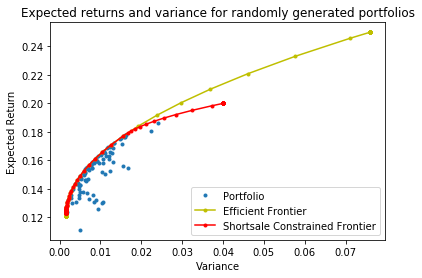

In [2]:
h2 = opt.matrix(0.0, (n_asset, 1)) # all 3 portions >= 0, shortsale constraint
A = opt.matrix(1.0, (1, n_asset)) # all 3 portions sum to 1
b = opt.matrix(1.0)

portfolios = [solvers.qp(x*S, -q, G, h2, A, b)['x'] for x in points]
returns = [blas.dot(q, x) for x in portfolios]
risks = [blas.dot(x, S*x) for x in portfolios]

frontier = ax.plot(risks, returns, 'r-o', markersize=3, label='Shortsale Constrained Frontier')
ax.legend(loc='best')
fig

In [3]:
for x in portfolios:
    print x

[ 8.30e-09]
[ 1.00e+00]
[ 1.38e-08]

[ 6.18e-09]
[ 1.00e+00]
[ 1.39e-08]

[ 4.99e-09]
[ 1.00e+00]
[ 1.73e-08]

[ 5.04e-09]
[ 1.00e+00]
[ 2.51e-08]

[ 5.10e-09]
[ 1.00e+00]
[ 3.41e-08]

[ 5.17e-09]
[ 1.00e+00]
[ 4.45e-08]

[ 5.26e-09]
[ 1.00e+00]
[ 5.68e-08]

[ 5.36e-09]
[ 1.00e+00]
[ 7.13e-08]

[ 5.50e-09]
[ 1.00e+00]
[ 8.86e-08]

[ 5.67e-09]
[ 1.00e+00]
[ 1.10e-07]

[ 5.88e-09]
[ 1.00e+00]
[ 1.36e-07]

[ 6.59e-09]
[ 1.00e+00]
[ 1.71e-07]

[ 1.38e-08]
[ 1.00e+00]
[ 2.38e-07]

[ 2.34e-08]
[ 1.00e+00]
[ 3.31e-07]

[ 3.64e-08]
[ 1.00e+00]
[ 4.66e-07]

[ 5.47e-08]
[ 1.00e+00]
[ 6.72e-07]

[ 8.12e-08]
[ 1.00e+00]
[ 1.01e-06]

[ 1.22e-07]
[ 1.00e+00]
[ 1.70e-06]

[ 1.90e-07]
[ 1.00e+00]
[ 3.57e-06]

[ 3.02e-07]
[ 1.00e+00]
[ 1.04e-05]

[ 4.23e-09]
[ 1.00e+00]
[ 4.48e-07]

[ 2.97e-08]
[ 1.00e+00]
[ 1.81e-05]

[ 2.85e-08]
[ 9.66e-01]
[ 3.41e-02]

[ 9.46e-09]
[ 9.01e-01]
[ 9.85e-02]

[ 8.26e-07]
[ 8.44e-01]
[ 1.56e-01]

[ 7.70e-07]
[ 7.93e-01]
[ 2.07e-01]

[ 1.17e-06]
[ 7.47e-01]
[ 2.53e-01]

[